In [1]:
# used ordered vector in stan code vaiable declaration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pystan
import pandas as pd
import arviz as az


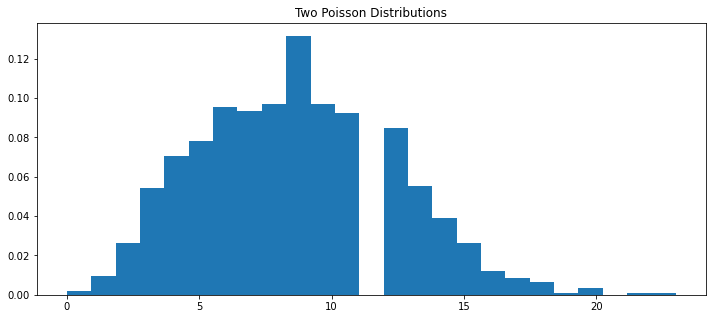

In [3]:
K = 2

A_lambda = 5
B_lambda = 10

A_num = 300
B_num = 700
total = A_num + B_num

A = np.random.poisson(A_lambda, A_num)
B = np.random.poisson(B_lambda, B_num)

X = np.concatenate([A, B])

plt.figure(figsize=(12, 5))
plt.title('Two Poisson Distributions')
plt.hist(X, bins = 25, density = True)
plt.show()

In [4]:
stan_data = {
    'N': total,
    'K': K,
    'X': X,
}

In [5]:
stan_code = """
data{
    int N;
    int K;
    int X[N];
}

parameters {
    ordered[K] lambda;
    simplex[K] pi;
}

model {
    real lp[K];
    pi ~ beta(5, 5);
    
    for(n in 1:N){
        for (k in 1:K){
            lp[k] = log(pi[k]) + poisson_lpmf(X[n] | lambda[k]);
        }
        target += log_sum_exp(lp);
    }
}
"""

In [6]:
sm = pystan.StanModel(model_code= stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e4df1af789e6e6fd53383743f65b17c5 NOW.


In [7]:
mcmc_result = sm.sampling(
    data=stan_data,
    chains=4,
    iter=3000,
    warmup=2000,
    thin=1
)

In [8]:
print(mcmc_result)

Inference for Stan model: anon_model_e4df1af789e6e6fd53383743f65b17c5.
4 chains, each with iter=3000; warmup=2000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda[1]   5.05  8.7e-3   0.31   4.45   4.84   5.05   5.25   5.66   1261    1.0
lambda[2]  10.05  4.0e-3    0.2   9.68   9.92  10.05  10.18  10.45   2423    1.0
pi[1]        0.3  1.0e-3   0.04   0.22   0.27   0.29   0.32   0.37   1418    1.0
pi[2]        0.7  1.0e-3   0.04   0.63   0.68   0.71   0.73   0.78   1418    1.0
lp__       -2722    0.03   1.21  -2725  -2722  -2721  -2721  -2720   1295    1.0

Samples were drawn using NUTS at Thu Oct  7 21:08:27 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


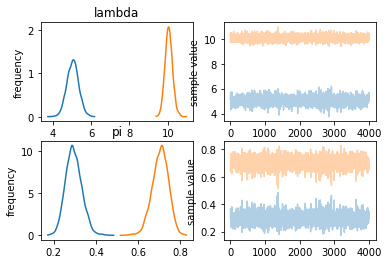

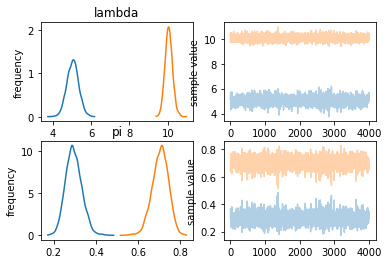

In [9]:
mcmc_result.plot()

In [10]:
print('True_lambda: ', A_lambda, B_lambda)
print('Estimated lambda: ', mcmc_result['lambda[1]'].mean(), mcmc_result['lambda[2]'].mean())

True_lambda:  5 10
Estimated lambda:  5.046718882541646 10.05128790025731


In [11]:
print('True_pi: ', A_num/total, B_num/total)
print('Estimated lambda: ', mcmc_result['pi[1]'].mean(), mcmc_result['pi[2]'].mean())

True_pi:  0.3 0.7
Estimated lambda:  0.2952863232249628 0.7047136767750373


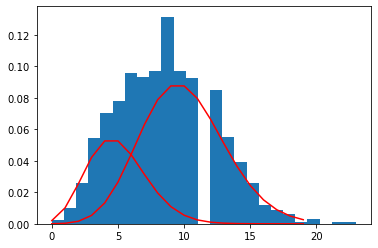

In [12]:
from scipy.stats import poisson

x = np.arange(0, 20, 1)
y1 = A_num/total * poisson.pmf(x, mu= A_lambda) 
y2 = B_num/total * poisson.pmf(x, mu= B_lambda)
z = y1 + y2

plt.plot(x, y1, color = 'red')
plt.plot(x, y2, color = 'red')

plt.hist(X, bins = 25, density = True)
plt.show()